In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from pathlib import Path

In [2]:
# set path
crime_all_path = "crime-data/combined_wacrime.csv"

# read the csv file into pandas and remove unnamed columns
crime_all_df = pd.read_csv(crime_all_path, index_col=0, encoding="UTF-8")
crime_all_df.loc[:, ~crime_all_df.columns.str.contains('Unnamed')]
crime_all_df = crime_all_df.dropna(how="any", axis=0)

In [3]:
# drop the total columns
crime_all_df_totals = crime_all_df[['Month and Year',
                                    'Homicide Total', 
                                   'Recent Sexual Offence Total', 
                                   'Historical Sexual Offence Total',
                                   'Assault (Family) Total',
                                   'Assault (Non-Family) Total',
                                   'Threatening Behaviour (Family) Total',
                                   'Threatening Behaviour (Non-Family) Total',
                                   'Deprivation of Liberty Total',
                                   'Robbery Total',
                                   'Burglary Total',
                                   'Stealing of Motor Vehicle',
                                   'Stealing Total',
                                   'Property Damage Total',
                                   'Arson Total',
                                   'Drug Offences Total',
                                   'Receiving and Possession of Stolen Property Total',
                                   'Regulated Weapons Offences',
                                   'Graffiti',
                                   'Fraud & Related Offences Total',
                                   'Breach of Violence Restraint Order Total'
                                    ]]
crime_all_df_totals

,Month and Year,Homicide Total,Recent Sexual Offence Total,Historical Sexual Offence Total,Assault (Family) Total,Assault (Non-Family) Total,Threatening Behaviour (Family) Total,Threatening Behaviour (Non-Family) Total,Deprivation of Liberty Total,Robbery Total,...,Stealing of Motor Vehicle,Stealing Total,Property Damage Total,Arson Total,Drug Offences Total,Receiving and Possession of Stolen Property Total,Regulated Weapons Offences,Graffiti,Fraud & Related Offences Total,Breach of Violence Restraint Order Total
Region,,,,,,,,,,,,,,,,,,,,,
Armadale,Feb-07,0.0,16.0,6.0,55.0,61.0,11.0,21.0,1.0,10.0,...,72.0,568.0,260.0,9.0,102.0,16.0,14.0,276.0,28.0,45.0
Armadale,Mar-07,1.0,8.0,13.0,62.0,77.0,7.0,24.0,1.0,5.0,...,71.0,601.0,268.0,13.0,86.0,7.0,13.0,232.0,43.0,142.0
Armadale,Apr-07,0.0,29.0,16.0,42.0,88.0,2.0,18.0,4.0,17.0,...,46.0,500.0,245.0,12.0,144.0,36.0,5.0,96.0,7.0,50.0
Armadale,May-07,0.0,22.0,20.0,40.0,86.0,7.0,17.0,3.0,13.0,...,50.0,592.0,253.0,6.0,138.0,10.0,22.0,132.0,20.0,111.0
Armadale,Jun-07,2.0,12.0,5.0,42.0,65.0,11.0,21.0,1.0,13.0,...,41.0,537.0,260.0,11.0,149.0,10.0,19.0,177.0,51.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wheatbelt,Aug-18,1.0,2.0,10.0,27.0,24.0,4.0,11.0,0.0,0.0,...,9.0,82.0,59.0,0.0,87.0,3.0,10.0,1.0,13.0,18.0
Wheatbelt,Sep-18,0.0,4.0,0.0,28.0,22.0,7.0,8.0,0.0,0.0,...,4.0,82.0,46.0,10.0,85.0,6.0,15.0,2.0,4.0,13.0
Wheatbelt,Oct-18,0.0,2.0,12.0,37.0,11.0,5.0,2.0,1.0,0.0,...,8.0,90.0,68.0,0.0,95.0,13.0,29.0,1.0,11.0,21.0


In [4]:
# drop null values and convert dtype
no_date = crime_all_df_totals.drop(columns=["Month and Year"])
no_date = no_date.astype(int)
no_date

,Homicide Total,Recent Sexual Offence Total,Historical Sexual Offence Total,Assault (Family) Total,Assault (Non-Family) Total,Threatening Behaviour (Family) Total,Threatening Behaviour (Non-Family) Total,Deprivation of Liberty Total,Robbery Total,Burglary Total,Stealing of Motor Vehicle,Stealing Total,Property Damage Total,Arson Total,Drug Offences Total,Receiving and Possession of Stolen Property Total,Regulated Weapons Offences,Graffiti,Fraud & Related Offences Total,Breach of Violence Restraint Order Total
Region,,,,,,,,,,,,,,,,,,,,
Armadale,0,16,6,55,61,11,21,1,10,280,72,568,260,9,102,16,14,276,28,45
Armadale,1,8,13,62,77,7,24,1,5,390,71,601,268,13,86,7,13,232,43,142
Armadale,0,29,16,42,88,2,18,4,17,262,46,500,245,12,144,36,5,96,7,50
Armadale,0,22,20,40,86,7,17,3,13,269,50,592,253,6,138,10,22,132,20,111
Armadale,2,12,5,42,65,11,21,1,13,259,41,537,260,11,149,10,19,177,51,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wheatbelt,1,2,10,27,24,4,11,0,0,37,9,82,59,0,87,3,10,1,13,18
Wheatbelt,0,4,0,28,22,7,8,0,0,35,4,82,46,10,85,6,15,2,4,13
Wheatbelt,0,2,12,37,11,5,2,1,0,51,8,90,68,0,95,13,29,1,11,21


In [5]:
#count the total numbers of each type of crime
count_totals = no_date.loc[:, "Homicide Total" : "Breach of Violence Restraint Order Total"].sum()
count_totals

Homicide Total                                          3245
Recent Sexual Offence Total                           111934
Historical Sexual Offence Total                        67580
Assault (Family) Total                                548561
Assault (Non-Family) Total                            424130
Threatening Behaviour (Family) Total                   77277
Threatening Behaviour (Non-Family) Total              102736
Deprivation of Liberty Total                            9234
Robbery Total                                          51476
Burglary Total                                       1063386
Stealing of Motor Vehicle                             243806
Stealing Total                                       2601045
Property Damage Total                                1096425
Arson Total                                            36968
Drug Offences Total                                   783887
Receiving and Possession of Stolen Property Total     112636
Regulated Weapons Offenc

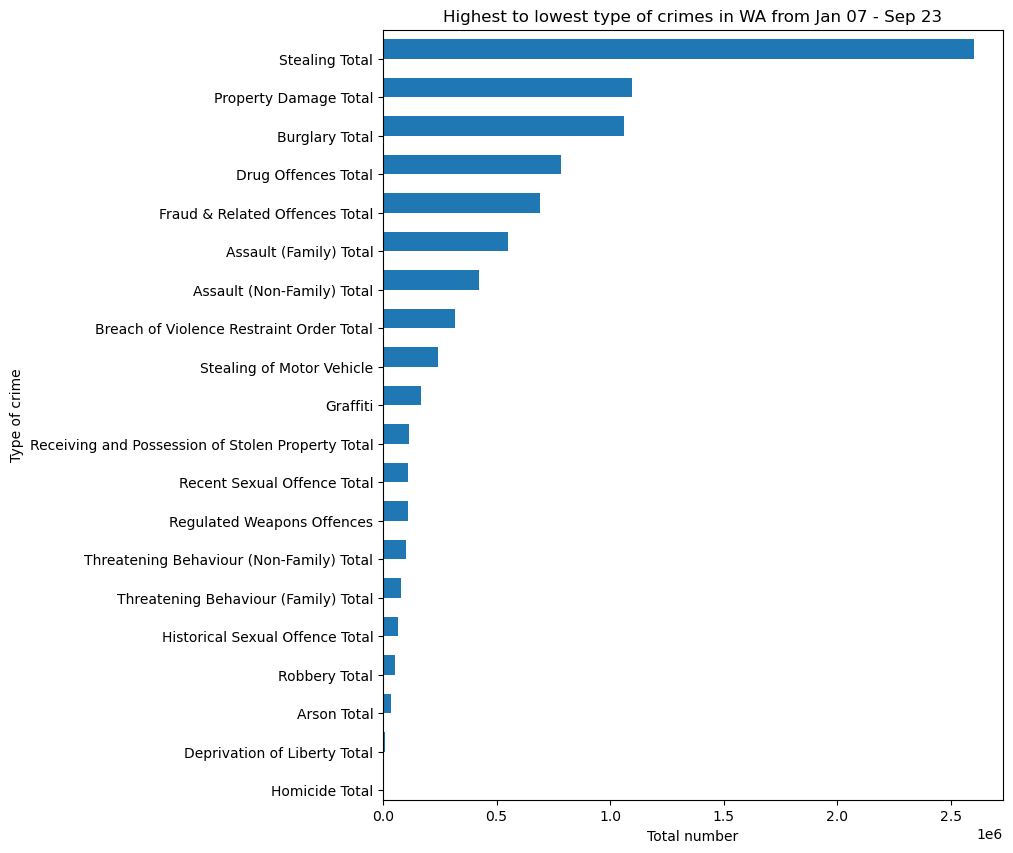

In [6]:
#display above results in bar graph from higest to lowest
totals_plot = count_totals.sort_values().plot(kind='barh', figsize=(8,10), alpha=1, align="edge")
plt.ylabel("Type of crime")
plt.xlabel("Total number")
plt.title("Highest to lowest type of crimes in WA from Jan 07 - Sep 23")

# save the fig
plt.savefig("crime-data/Fig1.png", bbox_inches="tight")

plt.show()

In [7]:
# find the top highest totals and create a string for the remaining
high_five = count_totals.sort_values(ascending=False).head(5)
other_highfive = count_totals.sort_values(ascending=False).tail(15).sum()

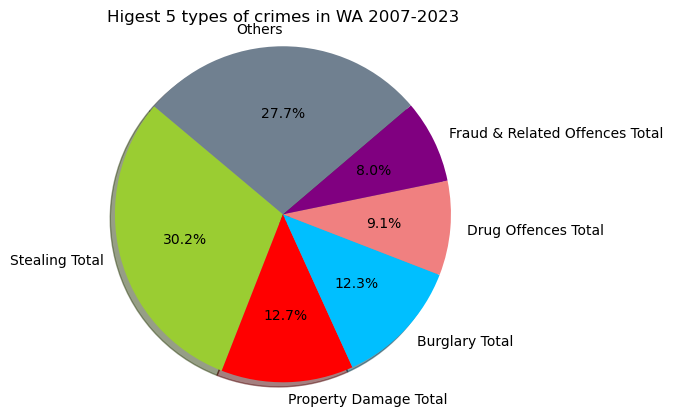

In [8]:
# enter above found data in a list and plot as pie to visualise top 5 and a slice for all others
slices = ['Stealing Total', 'Property Damage Total ', 'Burglary Total', 'Drug Offences Total', 'Fraud & Related Offences Total', 'Others']
numbers_top = [2601045, 1096425, 1063386, 783887, 690245, 2384598]
colors = ["yellowgreen", "red", "deepskyblue", "lightcoral", "purple", "slategrey"]

plt.pie(numbers_top, labels=slices, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("Higest 5 types of crimes in WA 2007-2023")
plt.savefig("crime-data/Fig2.png", bbox_inches="tight")
plt.show()

In [9]:
#group all areas and drop metroplitan/regional as its overlapping
region_grouped = no_date.groupby(['Region'])
region_totals = region_grouped.sum().transpose()
region_totals = region_totals.drop(columns=["Metropolitan", "Regional"])
region_totals

Region,Armadale,Cannington,Fremantle,Goldfields-Esperance,Great_Southern,Joondalup,Kimberley,Mandurah,Mid_West_Gascoyne,Midland,Mirrabooka,Perth,Pilbara,South_West,Wheatbelt
Homicide Total,121,107,107,92,65,147,115,156,77,132,146,78,92,124,54
Recent Sexual Offence Total,5173,4003,4264,1914,1728,6145,2520,6152,1986,5292,4759,5853,2133,3117,725
Historical Sexual Offence Total,3306,2173,2112,1258,1590,3438,1596,4109,1328,3527,2732,2033,1327,2226,888
Assault (Family) Total,23964,19826,17871,14227,7807,21064,34405,28363,15578,24736,21872,9306,17021,13308,3817
Assault (Non-Family) Total,16519,16616,17301,10435,6128,16091,11275,19163,10052,16896,16995,30308,9118,11075,3520
Threatening Behaviour (Family) Total,3850,2769,2852,1647,1120,2482,4743,4024,2922,3784,2914,1069,1837,1766,620
Threatening Behaviour (Non-Family) Total,4859,5057,4418,2332,1515,3664,2319,4806,2616,4573,4569,5006,1585,2631,1213
Deprivation of Liberty Total,490,541,343,179,122,428,266,455,174,440,492,292,149,180,50
Robbery Total,2426,3639,2615,460,254,2612,426,2571,583,2301,3291,3389,302,730,124
Burglary Total,48564,61550,57542,18236,13390,44641,23937,53644,23233,47899,60502,28275,16016,25420,8176


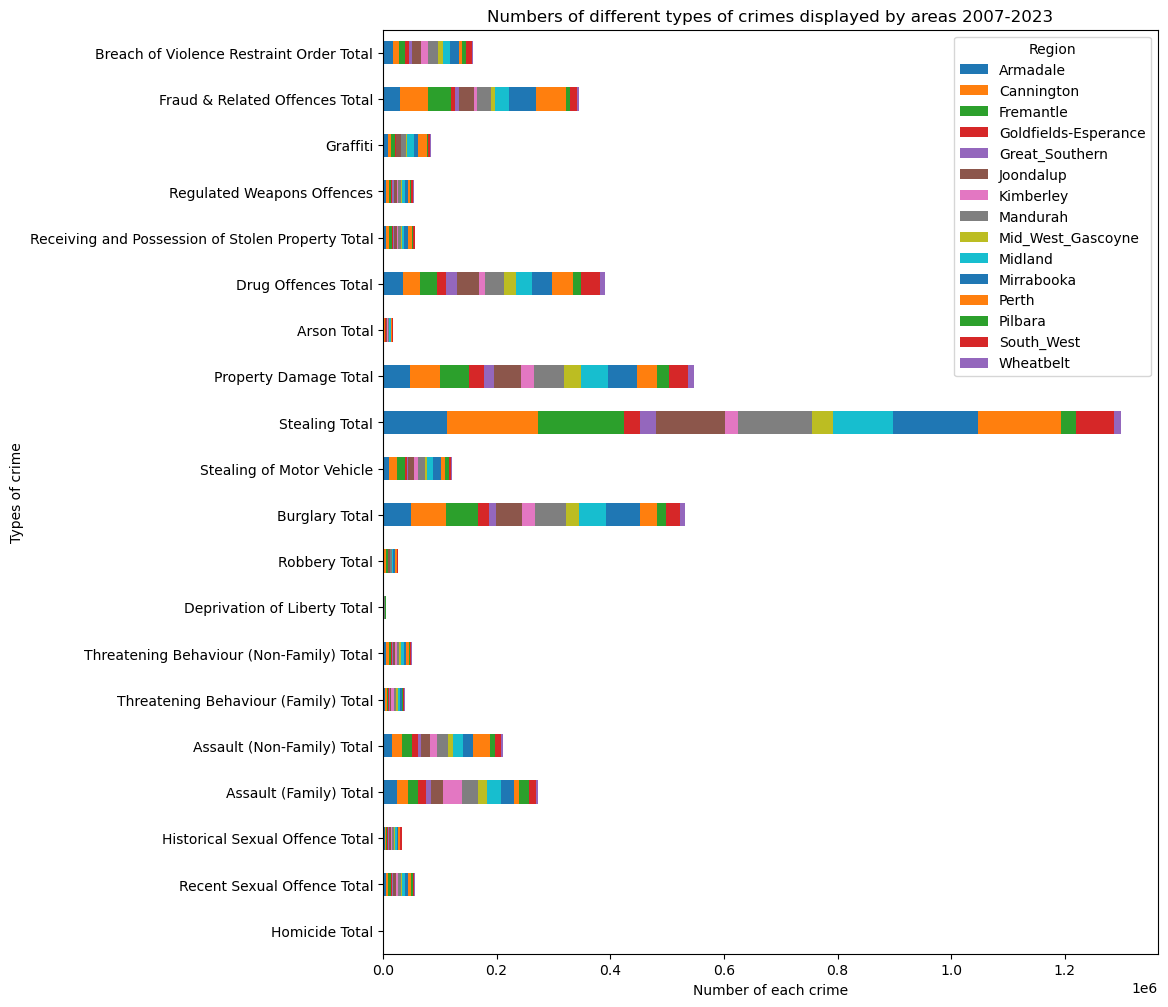

In [10]:
# create a stacked bar graph for all types against areas
region_totals = pd.DataFrame(region_totals)

region_totals.plot(kind="barh", stacked=True, figsize=(10,12), alpha=1)
plt.title("Numbers of different types of crimes displayed by areas 2007-2023")
plt.xlabel("Number of each crime")
plt.ylabel("Types of crime")
plt.savefig("crime-data/Fig3.png", bbox_inches="tight")
plt.show()

In [11]:
# Rename Month and year column to Date
crime_all_df_totals = crime_all_df_totals.rename(columns={'Month and Year': 'Date'})

# Convert Date column to date time
crime_all_df_totals['Date'] = pd.to_datetime(crime_all_df_totals['Date'], format='%b-%y')

# Create new columns for Month and Year
crime_all_df_totals['Month'] = crime_all_df_totals['Date'].dt.month
crime_all_df_totals['Year'] = crime_all_df_totals['Date'].dt.year

# Remove the date and month as not relevant to my questions
new_df = crime_all_df_totals.drop(columns=["Month", "Date"], axis=0)

# Set index to Year
new_df = new_df.set_index("Year")
new_df

,Homicide Total,Recent Sexual Offence Total,Historical Sexual Offence Total,Assault (Family) Total,Assault (Non-Family) Total,Threatening Behaviour (Family) Total,Threatening Behaviour (Non-Family) Total,Deprivation of Liberty Total,Robbery Total,Burglary Total,Stealing of Motor Vehicle,Stealing Total,Property Damage Total,Arson Total,Drug Offences Total,Receiving and Possession of Stolen Property Total,Regulated Weapons Offences,Graffiti,Fraud & Related Offences Total,Breach of Violence Restraint Order Total
Year,,,,,,,,,,,,,,,,,,,,
2007,0.0,16.0,6.0,55.0,61.0,11.0,21.0,1.0,10.0,280.0,72.0,568.0,260.0,9.0,102.0,16.0,14.0,276.0,28.0,45.0
2007,1.0,8.0,13.0,62.0,77.0,7.0,24.0,1.0,5.0,390.0,71.0,601.0,268.0,13.0,86.0,7.0,13.0,232.0,43.0,142.0
2007,0.0,29.0,16.0,42.0,88.0,2.0,18.0,4.0,17.0,262.0,46.0,500.0,245.0,12.0,144.0,36.0,5.0,96.0,7.0,50.0
2007,0.0,22.0,20.0,40.0,86.0,7.0,17.0,3.0,13.0,269.0,50.0,592.0,253.0,6.0,138.0,10.0,22.0,132.0,20.0,111.0
2007,2.0,12.0,5.0,42.0,65.0,11.0,21.0,1.0,13.0,259.0,41.0,537.0,260.0,11.0,149.0,10.0,19.0,177.0,51.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,1.0,2.0,10.0,27.0,24.0,4.0,11.0,0.0,0.0,37.0,9.0,82.0,59.0,0.0,87.0,3.0,10.0,1.0,13.0,18.0
2018,0.0,4.0,0.0,28.0,22.0,7.0,8.0,0.0,0.0,35.0,4.0,82.0,46.0,10.0,85.0,6.0,15.0,2.0,4.0,13.0
2018,0.0,2.0,12.0,37.0,11.0,5.0,2.0,1.0,0.0,51.0,8.0,90.0,68.0,0.0,95.0,13.0,29.0,1.0,11.0,21.0


In [12]:
# Convert to int type
new_df = new_df.astype(int)
# Group the years
years_df = new_df.groupby(["Year"])
# Grouped year_wacrime_df
years_df = years_df.sum().head(17)
years_df

,Homicide Total,Recent Sexual Offence Total,Historical Sexual Offence Total,Assault (Family) Total,Assault (Non-Family) Total,Threatening Behaviour (Family) Total,Threatening Behaviour (Non-Family) Total,Deprivation of Liberty Total,Robbery Total,Burglary Total,Stealing of Motor Vehicle,Stealing Total,Property Damage Total,Arson Total,Drug Offences Total,Receiving and Possession of Stolen Property Total,Regulated Weapons Offences,Graffiti,Fraud & Related Offences Total,Breach of Violence Restraint Order Total
Year,,,,,,,,,,,,,,,,,,,,
2007,182,4111,3645,14773,25107,1734,5081,650,3504,68592,12973,143751,76976,2299,32232,3573,4161,29689,12851,10987
2008,198,4630,3212,15828,27446,1880,5426,676,3542,76252,15336,163654,85708,2772,34778,5090,5054,30228,15390,12316
2009,194,4588,3282,16744,28300,1948,5680,636,3382,66446,13230,141414,81160,3006,36110,5076,4376,24392,17718,12360
2010,212,5392,3426,17112,25652,1918,4972,524,3438,63204,13282,130494,69516,2224,30898,4088,3912,19700,13030,13168
2011,182,4082,3412,19656,24542,2178,4826,456,3712,73716,15530,149858,70750,2090,28488,4282,4338,11022,14424,15276
2012,240,4316,3596,23888,23396,2674,4932,518,3432,72920,18108,155586,68276,2238,33986,5236,5404,7298,49476,15688
2013,188,4718,4010,29014,22692,3112,4674,442,3042,70952,17568,153816,65232,2324,36818,5464,5980,7040,53006,16162
2014,178,6066,3634,29582,21536,3182,5604,456,2762,70018,16238,162762,62320,2404,48262,7140,7648,4552,44064,15824
2015,208,6710,4220,37086,23078,4468,6216,560,2746,75040,17084,185660,70320,2436,61246,8462,8678,4254,44430,19314


In [ ]:
yearly_stats_df = crime_quarterly_df.copy()
yearly_stats_df = crime_yearly_descriptive_stats_df.groupby(crime_yearly_descriptive_stats_df.index.year)['Total Crime'].agg(['max', 'min', 'mean', 'median', 'var', 'std'])
yearly_stats_df

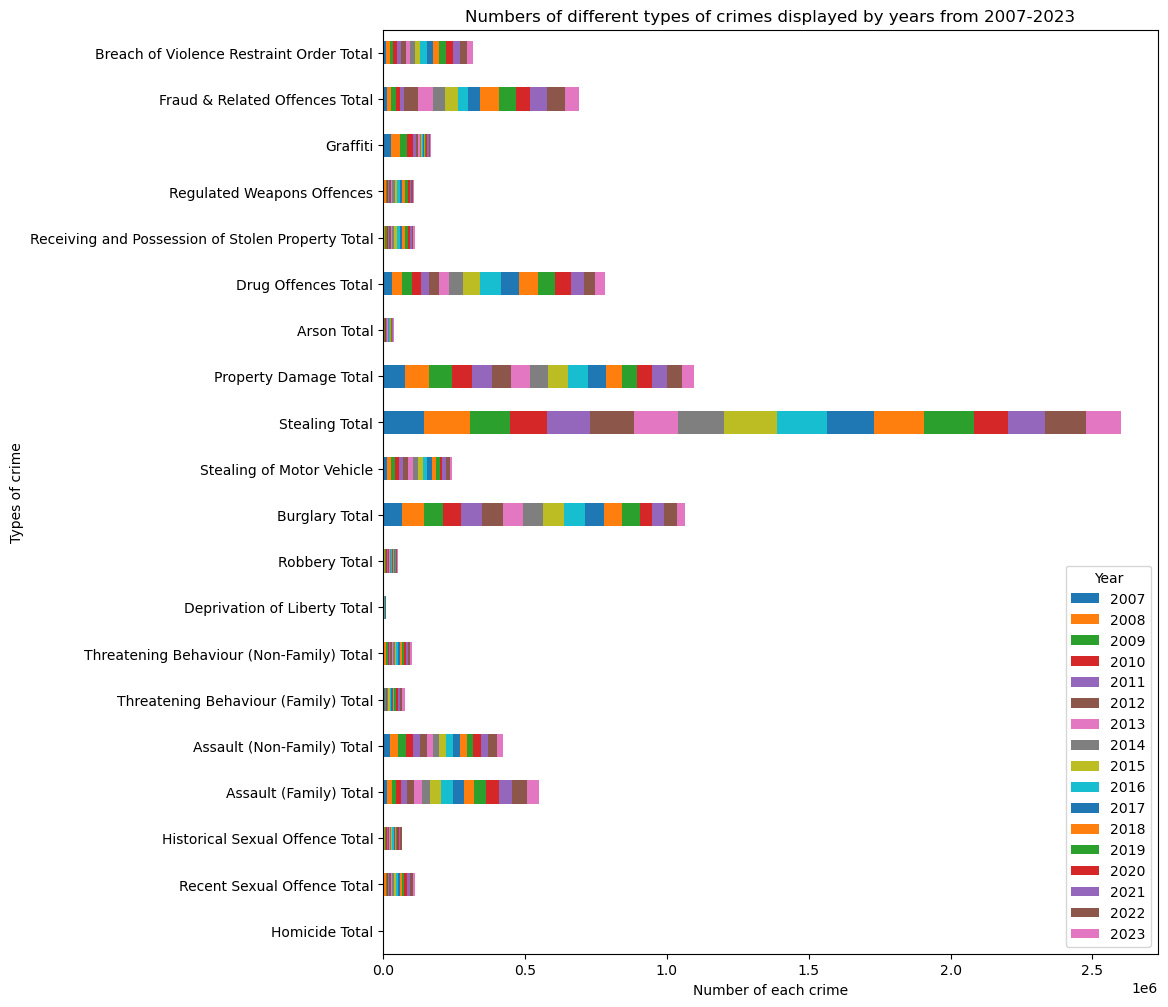

In [13]:
# create a stacked bar chart for types against years
plotyear = years_df.transpose()

plottear = pd.DataFrame(plotyear)

plotyear.plot(kind="barh", stacked=True, figsize=(10,12), alpha=1)
plt.title("Numbers of different types of crimes displayed by years from 2007-2023")
plt.xlabel("Number of each crime")
plt.ylabel("Types of crime")
plt.savefig("crime-data/Fig4.png", bbox_inches="tight")
plt.show()

In [14]:
#summary stats
count_totals
# Determine which measure of central tendency is most appropriate to describe the data
# Determine if there are any potential outliers in the average occupancy in California
quartiles = count_totals.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of totals of crime types is: {lowerq}")
print(f"The upper quartile of totals of crime types is: {upperq}")
print(f"The interquartile range of totals of crime types is: {iqr}")
print(f"The the median of total number of types of crime is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of totals of crime types is: 74852.75
The upper quartile of totals of crime types is: 583982.0
The interquartile range of totals of crime types is: 509129.25
The the median of total number of types of crime is: 140204.0 
Values below -688841.125 could be outliers.
Values above 1347675.875 could be outliers.
